In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
insurance_dataset = pd.read_csv("insurance.csv")

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape

(1338, 7)

In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


C:\Users\hp\AppData\Local\Temp\ipykernel_18540\1475069218.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


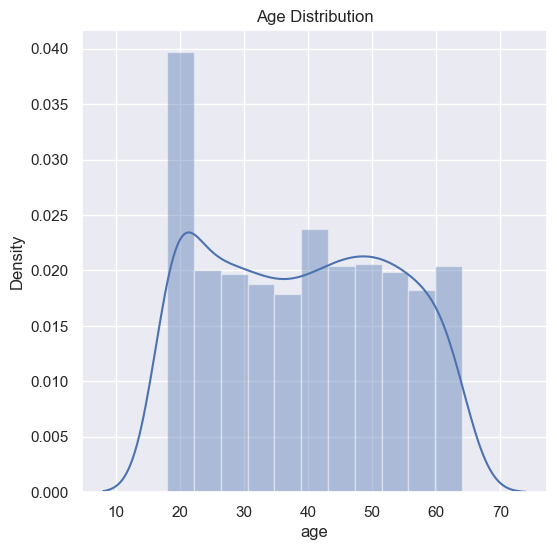

In [11]:
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

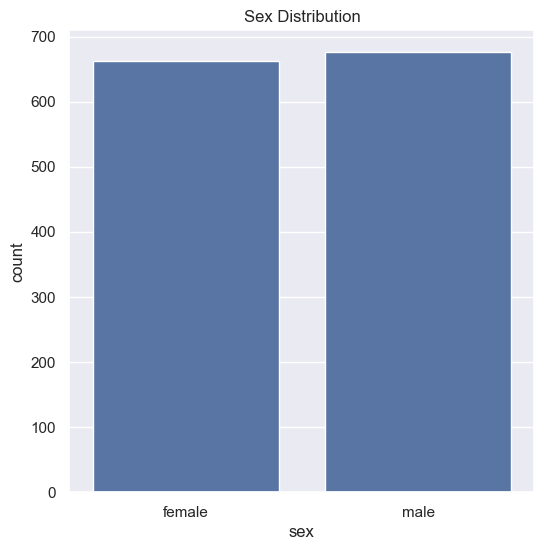

In [12]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'sex' , data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [15]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_18540\183719384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


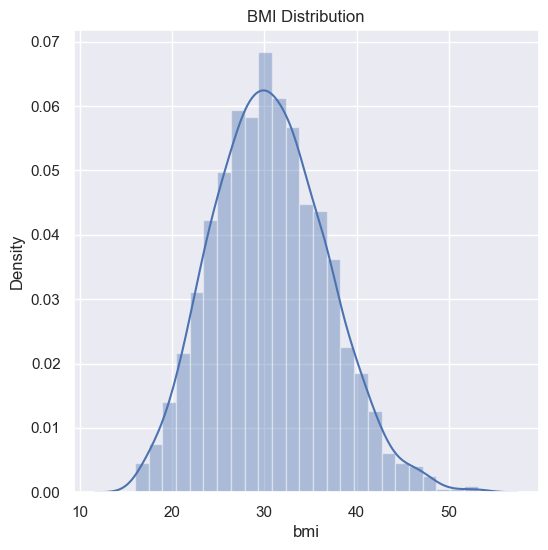

In [16]:
plt.figure(figsize = (6, 6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

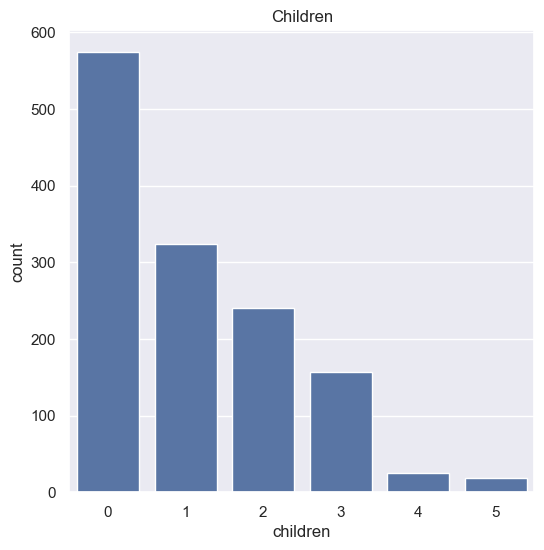

In [17]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'children' , data = insurance_dataset)
plt.title('Children')
plt.show()

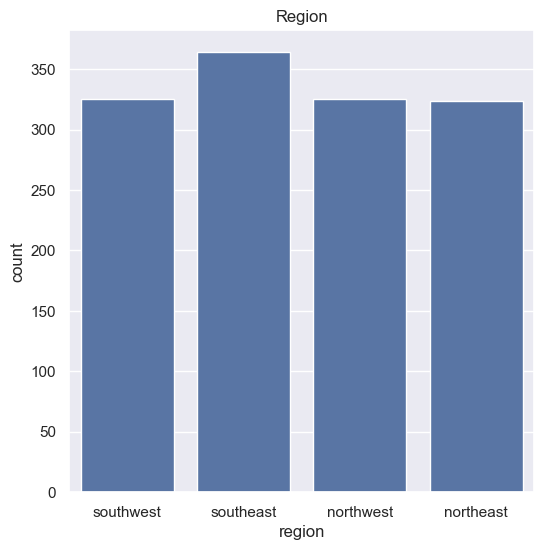

In [18]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'region' , data = insurance_dataset)
plt.title('Region')
plt.show()

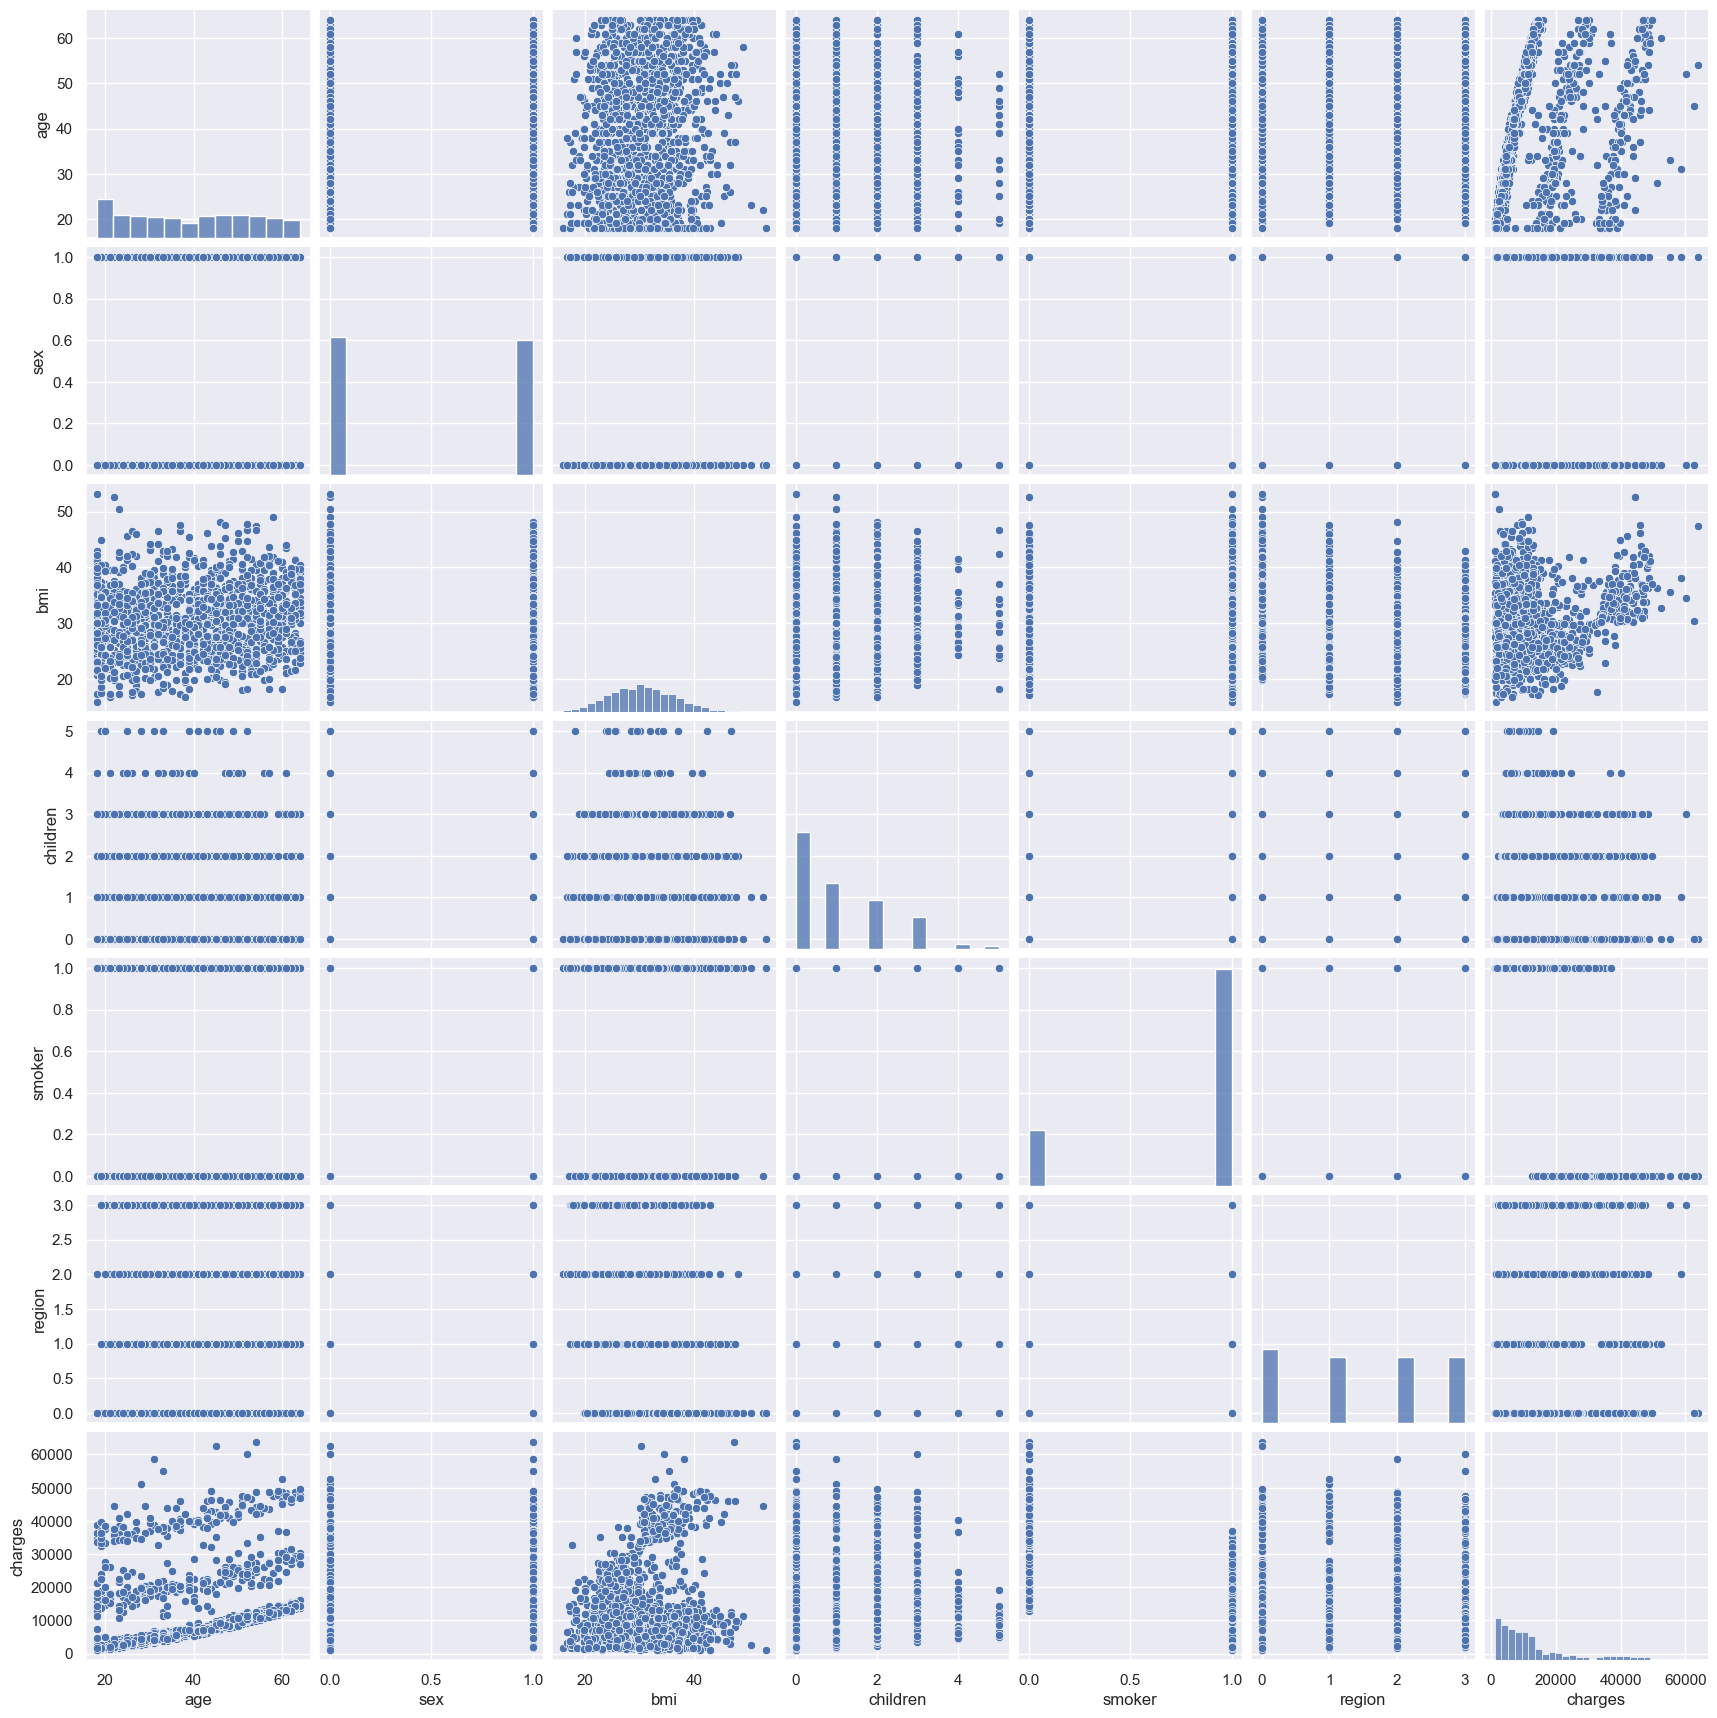

In [39]:
sns.pairplot(insurance_dataset)
plt.show()

In [41]:
insurance_dataset.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005212,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.016121,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.261829,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.019257,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.053930,-0.787251
region,0.005212,0.016121,-0.261829,0.019257,0.053930,1.000000,-0.056993
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.056993,1.000000


In [19]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [21]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
insurance_dataset.replace({'sex':{'male' : 0, 'female' : 1}}, inplace = True)
insurance_dataset.replace({'smoker':{'yes' : 0, 'no' : 1}}, inplace = True)
insurance_dataset.replace({'region':{'southeast' : 0, 'southwest' : 1, 'northeast' : 2, 'northwest' : 3}}, inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_18540\1248301959.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes' : 0, 'no' : 1}}, inplace = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_18540\1248301959.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'region':{'southeast' : 0, 'southwest' : 1, 'northeast' : 2, 'northwest' : 3}}, inplace = True)


In [24]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [25]:
x = insurance_dataset.drop(columns='charges', axis = 1)
y = insurance_dataset['charges']

In [26]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [27]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [29]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


In [30]:
lmodel = LinearRegression()

In [32]:
lmodel.fit(x_train, y_train)

LinearRegression()

In [42]:
lmodel.intercept_

11357.66874254093

In [43]:
lmodel.coef_

array([   251.40512196,     26.11715966,    330.64637157,    580.27438296,
       -23928.10171061,    212.22242728])

In [34]:
train_data_prediction = lmodel.predict(x_train)

In [37]:
r2_train = metrics.r2_score(y_train, train_data_prediction)
print("R2 value = ", r2_train)

R2 value =  0.751505643411174


In [38]:
test_data_prediction = lmodel.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
print("R2 value = ", r2_test)

R2 value =  0.7447273869684077


In [44]:
lmodel.score(x_train, y_train)

0.751505643411174

In [45]:
lmodel.score(x_test, y_test)

0.7447273869684077

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lmodel, x, y , cv = 5)
scores.mean()

0.7470257759641312

## Polynomial Regressor

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [52]:
train_rmse = []
test_rmse = []
for d in range(1, 5):
    polynomial_converter = PolynomialFeatures(degree = d, include_bias=False)
    x_poly = polynomial_converter.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size= .3, random_state= 2)
    Model = LinearRegression()
    Model.fit(x_train, y_train)
    train_pred = Model.predict(x_train)
    test_pred = Model.predict(x_test)
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    train_rmse.append(train_RMSE)
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
    test_rmse.append(test_RMSE)

In [53]:
print(train_rmse)

[6016.2284069061125, 4712.512790013558, 4541.073127961855, 4251.390334964554]


In [54]:
print(test_rmse)

[6148.515717819856, 4909.523236913848, 4981.950817856681, 5717.103520464642]


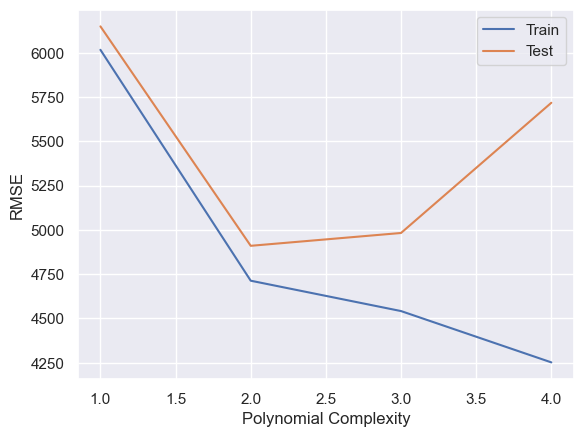

In [56]:
plt.plot(range(1, 5), train_rmse, label = 'Train')
plt.plot(range(1, 5), test_rmse, label = 'Test')
plt.xlabel('Polynomial Complexity')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Final Poly Model

In [57]:
polynomial_converter = PolynomialFeatures(degree = d, include_bias=False)
x_poly = polynomial_converter.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size= .3, random_state= 2)
Model = LinearRegression()
Model.fit(x_train, y_train)

LinearRegression()

In [58]:
print("Train Accuracy ", Model.score(x_train, y_train))
print("Test Accuracy ", Model.score(x_test, y_test))

Train Accuracy  0.8709520606303035
Test Accuracy  0.7977878674803212


In [59]:
cross_val_score(Model, x, y, cv = 5)

array([0.76258026, 0.70682745, 0.77683066, 0.7319328 , 0.75695771])

In [60]:
from joblib import dump
dump(Model, 'medical_insurance_cost_prediction_poly.joblib')
dump(polynomial_converter, 'poly_converter.joblib')

['poly_converter.joblib']